In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine
from datetime import date, timedelta
import calendar

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from itables import show
pd.options.display.max_rows = 31

engine = create_engine("sqlite:///c:\\ruby\\expense\\db\\development.sqlite3")
conn = engine.connect()

In [2]:
sql = "SELECT C.name AS item, G.name AS kind FROM categories C \
       JOIN groups G ON group_id = G.id"
df_c = pd.read_sql(sql, conn)
df_c.head()

,item,kind
0,Books & Software,Edutainment
1,CCF,Luxury
2,Cigarette,Luxury
3,Food,Food
4,Fuel,Transportation


In [3]:
month = date(2022, 8, 1)
bom = month
eom = month.replace(day=calendar.monthrange(month.year, month.month)[1])
bom, eom

(datetime.date(2022, 8, 1), datetime.date(2022, 8, 31))

In [4]:
bom
eom

datetime.date(2022, 8, 1)

datetime.date(2022, 8, 31)

In [5]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "%s" 
ORDER BY amount DESC
"""
sql = sql % eom
print(sql)


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "2022-08-31" 
ORDER BY amount DESC



In [6]:
df = pd.read_sql(sql, conn)
df

,date,amount,item,kind
0,2022-08-31,10000,Parent,Parent
1,2022-08-31,640,Internet Home,Communication
2,2022-08-31,450,Food,Food
3,2022-08-31,420,Netflix,Edutainment
4,2022-08-31,340,Packt,Edutainment
5,2022-08-31,320,Telephone Dtac,Communication
6,2022-08-31,170,Google,Edutainment
7,2022-08-31,100,Apple,Edutainment
8,2022-08-31,70,Patreon,Edutainment
9,2022-08-31,40,Apple,Edutainment


In [7]:
df.amount.sum()

12550

In [8]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "%s" 
ORDER BY amount DESC
"""
sql = sql % (eom)
print(sql)


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "2022-08-31" 
ORDER BY amount DESC



In [9]:
df_eom = pd.read_sql(sql, conn)
df_eom

,date,amount,item,kind
0,2022-08-31,10000,Parent,Parent
1,2022-08-31,640,Internet Home,Communication
2,2022-08-31,450,Food,Food
3,2022-08-31,420,Netflix,Edutainment
4,2022-08-31,340,Packt,Edutainment
5,2022-08-31,320,Telephone Dtac,Communication
6,2022-08-31,170,Google,Edutainment
7,2022-08-31,100,Apple,Edutainment
8,2022-08-31,70,Patreon,Edutainment
9,2022-08-31,40,Apple,Edutainment


In [10]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date BETWEEN "%s" AND "%s" 
ORDER BY date
"""
sql = sql % (bom, eom)
print(sql)


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date BETWEEN "2022-08-01" AND "2022-08-31" 
ORDER BY date



In [11]:
df_t = pd.read_sql(sql, conn)
df_t.head()

,date,amount,item,kind
0,2022-08-02,370,Food,Food
1,2022-08-02,1000,Merit Making,Others
2,2022-08-04,3200,Shelter,Shelter
3,2022-08-05,590,Food,Food
4,2022-08-06,6000,Mother,Parent


In [12]:
grouped = df_t.groupby("item")
grouped['amount'].sum()

item
Apple               140
Food               6620
Google              170
Internet Home       640
Merit Making       1000
Mother             6000
Netflix             420
Packt               340
Parent            10000
Patreon              70
Pets                620
Plum              24400
Shelter            3200
Telephone Dtac      320
Name: amount, dtype: int64

In [13]:
grouped = df_t.groupby("kind")
grouped['amount'].sum()

kind
Communication      960
Edutainment       1140
Food              6620
Others            1000
Parent           16000
Pets               620
Shelter          27600
Name: amount, dtype: int64

In [14]:
expense = grouped.amount.sum()
sum(expense)

53940

<Figure size 864x864 with 0 Axes>

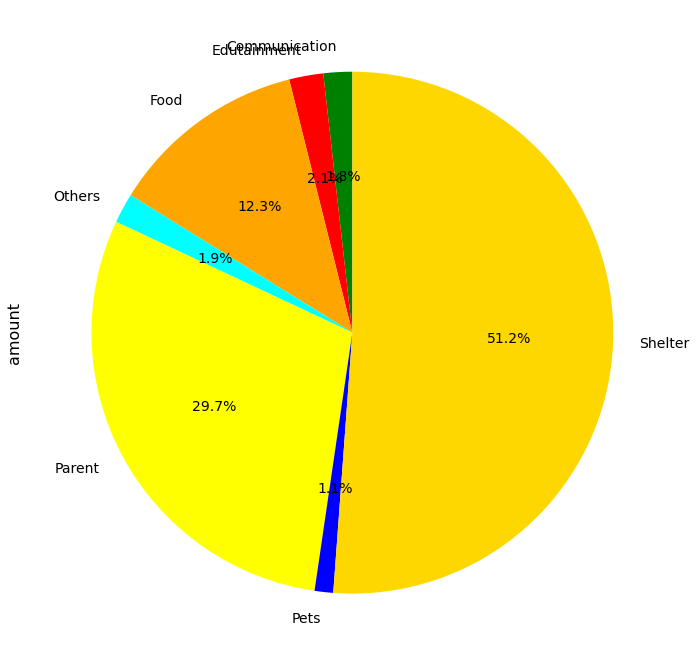

In [15]:
fig_path = "../fig/Expense-2208.png"
with plt.style.context("my_custom_style"):
    plt.figure(figsize=(12, 12))
    ax = expense.plot.pie(
        colors=["green", "red", "orange", "cyan", "yellow", "blue", "gold"],
        startangle=90,
        autopct="%1.1f%%",
    )
    plt.savefig(fig_path)

In [16]:
expense.to_csv("../data/expense-2208.csv")

In [17]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "%s" 
ORDER BY date
"""
sql = sql % (eom)
print(sql)


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "2022-08-31" 
ORDER BY date



In [18]:
df_tmp = pd.read_sql(sql, conn)
show(df_tmp[['date','amount','item','kind']])

<IPython.core.display.Javascript object>

date,amount,item,kind


In [19]:
df_tmp.to_csv("../data/expense-eom.csv")